In [2]:
import pandas as pd
from tensorflow.keras.models import load_model

In [3]:
# Read the preprocessed ratings-test dataset
df_test = pd.read_csv('data/preprocessed/ratings-test.csv')

In [4]:
df_test.head()

,movie_id,rating,user_id,openness,agreeableness,neuroticism,conscientiousness,extraversion
0,579,5.0,505,6.0,4.0,5.0,3.5,2.5
1,5271,1.5,505,6.0,4.0,5.0,3.5,2.5
2,698,4.0,505,6.0,4.0,5.0,3.5,2.5
3,5774,4.5,505,6.0,4.0,5.0,3.5,2.5
4,5915,2.5,505,6.0,4.0,5.0,3.5,2.5


In [5]:
test_user_ids = df_test['user_id'].values
test_movie_ids = df_test['movie_id'].values
test_ratings = df_test['rating'].values
test_personality = df_test[['openness', 'agreeableness', 'neuroticism', 'conscientiousness', 'extraversion']].values

ncf

In [6]:
model_ncf = load_model('saved-models/ncf.h5')
loss_ncf = model_ncf.evaluate([test_user_ids, test_movie_ids], test_ratings)
print("Test set loss:", loss_ncf)

6696/6696 [==============================] - 9s 1ms/step - loss: 0.6213
Test set loss: 0.6212708950042725


ncf-most-salient-personality

In [7]:
model_ncf_most_salient_personality = load_model('saved-models/ncf-most-salient-personality.h5')
loss_ncf_most_salient_personality = model_ncf_most_salient_personality.evaluate([test_user_ids, test_movie_ids, test_personality], test_ratings)
print("Test set loss:", loss_ncf_most_salient_personality)

6696/6696 [==============================] - 9s 1ms/step - loss: 0.6273
Test set loss: 0.6272820234298706


ncf-soft-labeled-personality

In [8]:
model_ncf_soft_labeled_personality = load_model('saved-models/ncf-soft-labeled-personality.h5')
loss_ncf_soft_labeled_personality = model_ncf_soft_labeled_personality.evaluate([test_user_ids, test_movie_ids, test_personality], test_ratings)
print("Test set loss:", loss_ncf_soft_labeled_personality)

6696/6696 [==============================] - 9s 1ms/step - loss: 0.5988
Test set loss: 0.5987539291381836


ncf-hard-labeled-personality

In [9]:
model_ncf_hard_coded_personality = load_model('saved-models/ncf-hard-coded-personality.h5')
loss_ncf_hard_coded_personality = model_ncf_hard_coded_personality.evaluate([test_user_ids, test_movie_ids, test_personality], test_ratings)
print("Test set loss:", loss_ncf_hard_coded_personality)

6696/6696 [==============================] - 8s 1ms/step - loss: 0.6146
Test set loss: 0.6145659685134888


ncf-most-salient-personality-mbti

In [10]:
df_rating_test_mbti = pd.read_csv('data/mbti/ratings-test.csv')
mbti_types = ['INTJ', 'INTP', 'ENTJ', 'ENTP', 'INFJ', 'INFP', 'ENFJ', 'ENFP', 'ISTJ', 'ISFJ', 'ESTJ', 'ESFJ', 'ISTP', 'ISFP', 'ESTP', 'ESFP']

test_user_ids = df_rating_test_mbti['user_id'].values
test_movie_ids = df_rating_test_mbti['movie_id'].values
test_mbti_scores = df_rating_test_mbti[mbti_types].values
test_ratings = df_rating_test_mbti['rating'].values

model_ncf_most_salient_personality_mbti = load_model('saved-models/ncf-most-salient-personality-mbti.h5')
loss_ncf_most_salient_personality_mbti = model_ncf_most_salient_personality_mbti.evaluate([test_user_ids, test_movie_ids, test_mbti_scores], test_ratings)

print("Test set loss:", loss_ncf_most_salient_personality_mbti)

6696/6696 [==============================] - 9s 1ms/step - loss: 0.6156
Test set loss: 0.6156397461891174


Loss plots

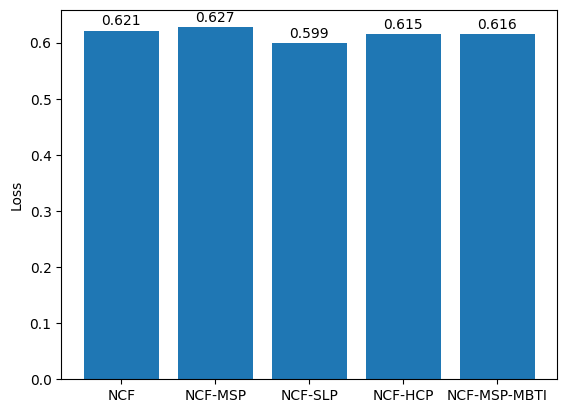

In [14]:
import matplotlib.pyplot as plt

labels = ['NCF', 'NCF-MSP', 'NCF-SLP', 'NCF-HCP', 'NCF-MSP-MBTI']
values = [loss_ncf, loss_ncf_most_salient_personality, loss_ncf_soft_labeled_personality, loss_ncf_hard_coded_personality, loss_ncf_most_salient_personality_mbti]

# Annotate values on top of bars
for i, v in enumerate(values):
	plt.text(i, v+0.01, str(round(v, 3)), ha='center')

plt.bar(labels, values)
plt.ylabel('Loss')

# Save to file
plt.savefig('model-evaluation-loss.png', bbox_inches='tight')

plt.show()